**AIVLE School 미니프로젝트**
### **공공데이터를 활용한 <span style="color:darkgreen">미세먼지 농도</span> 예측**
---

#### **<span style="color:red">[미션 안내]</span>**
* 개인 미션: 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요. ([2-1]부터 [2-10], [3-1]부터 [3-2] 까지 미션 수행)
* 조별 미션: 개인 미션 수행한 내용에 대해 토론하여 발표 준비를 해주세요.

#### **<span style="color:red">[주피터 노트북 파일 안내]</span>**
1. 탐색적 데이터 분석(solution).ipynb: 미션 수행 대상 아님. 제공된 solution을 참고하여 [2-1]부터의 미션 수행을 위한 탐색적 데이터 분석 진행</br>
2. 데이터 전처리.ipynb: [2-1]부터 [2-10] 까지 미션 수행 대상</br>
3. 모델링(머신러닝).ipynb: [3-1]부터 [3-2] 까지 미션 수행 대상. [4-1]~[4-4]는 선택 사항임</br>

#### **<span style="color:red">[데이터 설명]</span>**

* air_2021.csv : 2021년 미세먼지 데이터
* air_2022.csv : 2022년 미세먼지 데이터
* weather_2021.csv : 2021년 날씨 데이터
* weather_2022.csv : 2022년 날씨 데이터
* 학습 데이터: 2021년의 미세먼지 농도 데이터, 테스트 데이터: 2022년의 미세먼지 농도 데이터

# [Step 1] 탐색적 데이터 분석

#### **<span style="color:blue">[1-1] 필요한 라이브러리 설치</span>**

In [1]:
# 필요한 라이브러리 설치 및 임포트
# %pip install pandas seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

#### **<span style="color:blue">[1-2] 미세먼지 데이터 불러오기</span>**

* Pandas 라이브러리를 활용해서 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장하고 그 데이터를 확인하세요.
* 구분자(sep) : ','
* encoder = 'utf-8'
* index_col = 0

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장

air_21 = pd.read_csv("C:/Users/User/iCloudDrive/AIVLE/3월/1~2주차/air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_22 = pd.read_csv("C:/Users/User/iCloudDrive/AIVLE/3월/1~2주차/air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )

In [3]:
# air_21 데이터의 head 확인

air_21.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19


In [4]:
# air_21 데이터의 shape 확인

air_21.shape

(8760, 12)

In [5]:
# air_22 데이터의 head 확인

air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19


In [51]:
air_22['지역'].value_counts()

서울 종로구    2160
Name: 지역, dtype: int64

In [6]:
# air_22 데이터의 shape 확인

air_22.shape

(2160, 12)

---

#### **<span style="color:blue">[1-3] 날씨 데이터 불러오기</span>**

* Pandas 라이브러리를 활용해서 'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장하고 그 데이터를 확인하세요.
* 구분자(sep) : ','
* encoder = 'cp949'

In [7]:
#'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장

weather_21 = pd.read_csv("C:/Users/User/iCloudDrive/AIVLE/3월/1~2주차/weather_2021.csv", sep = ',', encoding='cp949')
weather_22 = pd.read_csv("C:/Users/User/iCloudDrive/AIVLE/3월/1~2주차/weather_2022.csv", sep = ',', encoding='cp949')

In [8]:
weather_21

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,108,서울,2021-12-31 19:00,-6.4,NaN,NaN,NaN,2.2,NaN,250.0,...,NaN,2000,NaN,NaN,-4.5,NaN,-0.5,-0.7,-0.1,1.0
8755,108,서울,2021-12-31 20:00,-6.3,NaN,NaN,NaN,4.1,NaN,320.0,...,NaN,2000,NaN,NaN,-5.3,NaN,-0.6,-0.8,-0.1,1.0
8756,108,서울,2021-12-31 21:00,-6.7,NaN,NaN,NaN,4.8,NaN,320.0,...,NaN,2000,NaN,NaN,-5.7,NaN,-0.7,-0.8,-0.1,1.0
8757,108,서울,2021-12-31 22:00,-7.5,NaN,NaN,NaN,3.0,NaN,320.0,...,NaN,2000,NaN,NaN,-6.2,NaN,-0.8,-0.9,-0.2,1.0


In [9]:
# 미세먼지 데이터와 같이 날씨 데이터의 head, shape 등을 확인

weather_21.shape, weather_22.shape

((8759, 38), (2160, 38))

---

#### **<span style="color:blue">[1-4] 데이터 변수 확인</span>**

In [10]:
# 각 데이터프레임의 info 확인

air_21.info()
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non

In [11]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_21['time'] = pd.to_datetime(weather_21['일시'])
weather_22['time'] = pd.to_datetime(weather_22['일시'])

In [49]:
weather_21

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,NaN,68,NaN,2.2,-13.5,1016.4,NaN,1027.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6,2021-01-01 01:00:00
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,NaN,69,NaN,2.1,-13.7,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6,2021-01-01 02:00:00
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,NaN,70,NaN,2.1,-13.7,1016.8,NaN,1028.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6,2021-01-01 03:00:00
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,NaN,71,NaN,2.2,-13.5,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5,2021-01-01 04:00:00
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,NaN,72,NaN,2.1,-13.8,1015.6,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5,2021-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,108,서울,2021-12-31 19:00,-6.4,NaN,NaN,NaN,2.2,NaN,250.0,NaN,34,NaN,1.3,-19.7,1021.1,NaN,1032.3,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-4.5,NaN,-0.5,-0.7,-0.1,1.0,2021-12-31 19:00:00
8755,108,서울,2021-12-31 20:00,-6.3,NaN,NaN,NaN,4.1,NaN,320.0,NaN,35,NaN,1.3,-19.2,1021.2,NaN,1032.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-5.3,NaN,-0.6,-0.8,-0.1,1.0,2021-12-31 20:00:00
8756,108,서울,2021-12-31 21:00,-6.7,NaN,NaN,NaN,4.8,NaN,320.0,NaN,36,NaN,1.3,-19.3,1021.2,NaN,1032.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-5.7,NaN,-0.7,-0.8,-0.1,1.0,2021-12-31 21:00:00
8757,108,서울,2021-12-31 22:00,-7.5,NaN,NaN,NaN,3.0,NaN,320.0,NaN,37,NaN,1.3,-19.7,1021.8,NaN,1033.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.2,NaN,-0.8,-0.9,-0.2,1.0,2021-12-31 22:00:00


In [13]:
# # for i in range(len(air_21['측정일시'])):
# #     # air_21['측정일시'][i] = air_21['측정일시'][i] * 100
# #     time = str(air_21['측정일시'][i])
# #     air_21['측정일시'][i] = str(time[:4] + '-' + time[4:6] + '-' + time[6:8] + time[9:-2] + ' ' + time[-2:] + ':00')

# # air_21['측정일시']

# weather_21.rename(columns = {'일시':'측정일시'},inplace=True)
# weather_21

In [14]:
air_21['time'] = pd.to_datetime(air_21['측정일시']-1, format='%Y%m%d%H')
air_22['time'] = pd.to_datetime(air_22['측정일시']-1, format='%Y%m%d%H')

In [15]:
air_21

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19,2021-10-01 00:00:00
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19,2021-10-01 01:00:00
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19,2021-10-01 02:00:00
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19,2021-10-01 03:00:00
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19,2021-10-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,서울 종로구,도시대기,111123,종로구,2021093020,0.003,0.7,0.020,0.036,35.0,24.0,서울 종로구 종로35가길 19,2021-09-30 19:00:00
8756,서울 종로구,도시대기,111123,종로구,2021093021,0.003,0.6,0.016,0.035,34.0,21.0,서울 종로구 종로35가길 19,2021-09-30 20:00:00
8757,서울 종로구,도시대기,111123,종로구,2021093022,0.003,0.6,0.012,0.036,30.0,19.0,서울 종로구 종로35가길 19,2021-09-30 21:00:00
8758,서울 종로구,도시대기,111123,종로구,2021093023,0.003,0.6,0.004,0.042,33.0,19.0,서울 종로구 종로35가길 19,2021-09-30 22:00:00


In [16]:
# merge_outer = pd.merge(df1,df2, how='outer',on='id')

pm_rate_21 = pd.merge(air_21, weather_21, how='inner', on='time')
pm_rate_22 = pd.merge(air_22, weather_22, how='inner', on='time')
pm_rate_21

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,...,NaN,2000,NaN,NaN,17.8,NaN,22.3,22.3,22.7,22.9
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,...,NaN,2000,NaN,NaN,17.4,NaN,22.1,22.0,22.5,22.9
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,...,NaN,2000,NaN,NaN,17.2,NaN,21.8,21.8,22.4,22.8
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,...,NaN,2000,NaN,NaN,17.0,NaN,21.6,21.6,22.2,22.8
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,...,NaN,2000,NaN,NaN,16.5,NaN,21.3,21.4,22.0,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,서울 종로구,도시대기,111123,종로구,2021093020,0.003,0.7,0.020,0.036,35.0,...,NaN,2000,NaN,NaN,20.6,NaN,24.2,23.7,23.0,22.6
8755,서울 종로구,도시대기,111123,종로구,2021093021,0.003,0.6,0.016,0.035,34.0,...,NaN,2000,NaN,NaN,19.9,NaN,23.7,23.4,23.1,22.8
8756,서울 종로구,도시대기,111123,종로구,2021093022,0.003,0.6,0.012,0.036,30.0,...,NaN,2000,NaN,NaN,19.2,NaN,23.3,23.1,23.0,22.9
8757,서울 종로구,도시대기,111123,종로구,2021093023,0.003,0.6,0.004,0.042,33.0,...,NaN,2000,NaN,NaN,18.6,NaN,23.0,22.8,22.9,22.9


In [17]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

pm_rate_21.isnull().sum()

지역                  0
망                   0
측정소코드               0
측정소명                0
측정일시                0
SO2               112
CO                 80
O3                 97
NO2                80
PM10              105
PM25               97
주소                  0
time                0
지점                  0
지점명                 0
일시                  0
기온(°C)              0
기온 QC플래그         8759
강수량(mm)          7810
강수량 QC플래그        6996
풍속(m/s)             2
풍속 QC플래그         8757
풍향(16방위)            2
풍향 QC플래그         8757
습도(%)               0
습도 QC플래그         8759
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그       8759
해면기압(hPa)           0
해면기압 QC플래그       8759
일조(hr)           3968
일조 QC플래그         4791
일사(MJ/m2)        3968
일사 QC플래그         4791
적설(cm)           8380
3시간신적설(cm)       8730
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
지면상태(지면상태코드)     8759
현상번호(국내식)        6634
지면온도(°C)  

In [18]:
pm_rate_22.isnull().sum()

지역                  0
망                   0
측정소코드               0
측정소명                0
측정일시                0
SO2                21
CO                 21
O3                 21
NO2                21
PM10               38
PM25               25
주소                  0
time                0
지점                  0
지점명                 0
일시                  0
기온(°C)              0
기온 QC플래그         2160
강수량(mm)          2079
강수량 QC플래그        1778
풍속(m/s)             0
풍속 QC플래그         2160
풍향(16방위)            0
풍향 QC플래그         2160
습도(%)               0
습도 QC플래그         2160
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그       2160
해면기압(hPa)           0
해면기압 QC플래그       2160
일조(hr)           1089
일조 QC플래그         1071
일사(MJ/m2)        1089
일사 QC플래그         1071
적설(cm)           2020
3시간신적설(cm)       2145
전운량(10분위)           0
중하층운량(10분위)         0
운형(운형약어)         1221
최저운고(100m )      1417
시정(10m)             0
지면상태(지면상태코드)     2160
현상번호(국내식)        1742
지면온도(°C)  

In [19]:
pm_rate_21.drop(['기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그', 
                             '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', 
                 '지면상태(지면상태코드)', '지면온도 QC플래그'], axis=1, inplace=True)
pm_rate_22.drop(['기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그', 
                             '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', 
                 '지면상태(지면상태코드)', '지면온도 QC플래그'], axis=1, inplace=True)
pm_rate_21.columns

Index(['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM25', '주소', 'time', '지점', '지점명', '일시', '기온(°C)', '풍속(m/s)',
       '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)',
       '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)',
       '현상번호(국내식)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [38]:
pd.set_option('display.max_columns', None)
pm_rate_21.tail(5)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
8754,서울 종로구,도시대기,111123,종로구,2021093020,0.003,0.7,0.020,0.036,35.0,24.0,서울 종로구 종로35가길 19,2021-09-30 19:00:00,108,서울,2021-09-30 19:00,22.7,0.2,0.0,71,19.5,17.1,998.4,1008.2,0.0,NaN,0.01,NaN,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,20.6,24.2,23.7,23.0,22.6
8755,서울 종로구,도시대기,111123,종로구,2021093021,0.003,0.6,0.016,0.035,34.0,21.0,서울 종로구 종로35가길 19,2021-09-30 20:00:00,108,서울,2021-09-30 20:00,21.7,0.9,320.0,79,20.4,17.8,998.8,1008.6,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,19.9,23.7,23.4,23.1,22.8
8756,서울 종로구,도시대기,111123,종로구,2021093022,0.003,0.6,0.012,0.036,30.0,19.0,서울 종로구 종로35가길 19,2021-09-30 21:00:00,108,서울,2021-09-30 21:00,20.9,0.4,0.0,83,20.4,17.8,999.2,1009.1,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,19.2,23.3,23.1,23.0,22.9
8757,서울 종로구,도시대기,111123,종로구,2021093023,0.003,0.6,0.004,0.042,33.0,19.0,서울 종로구 종로35가길 19,2021-09-30 22:00:00,108,서울,2021-09-30 22:00,20.4,0.8,70.0,81,19.4,17.0,999.2,1009.1,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,18.6,23.0,22.8,22.9,22.9
8758,서울 종로구,도시대기,111123,종로구,2021093024,0.003,0.6,0.003,0.042,29.0,17.0,서울 종로구 종로35가길 19,2021-09-30 23:00:00,108,서울,2021-09-30 23:00,19.7,1.4,20.0,81,18.5,16.3,999.2,1009.1,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,18.1,22.6,22.5,22.8,22.9


---

#### **<span style="color:blue">[1-5] 미세먼지 데이터 분석</span>**

* 데이터 전처리와 모델링을 위해 데이터 분석을 진행해보세요. 시각화 등을 통해 관측치들의 패턴 탐색, 잘못된 자료 탐색, 변수들간의 관계 파악을 할 수 있습니다.

In [21]:
# 시각화 한글폰트 설정 (아래 코드를 실행하세요)

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

<AxesSubplot:>

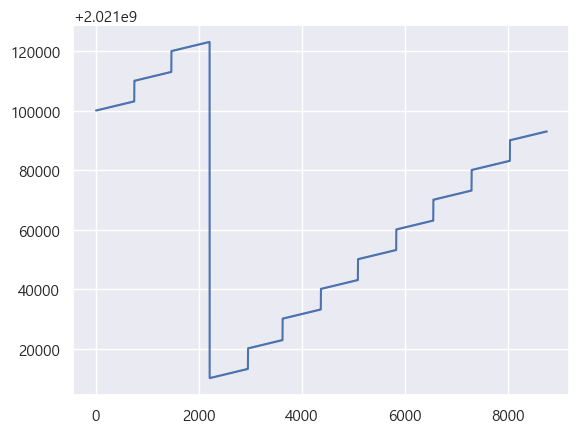

In [22]:
# air_21,air_22 의 다양한 변수에 대하여 시각화

air_21['측정일시'].plot.line()



<AxesSubplot:>

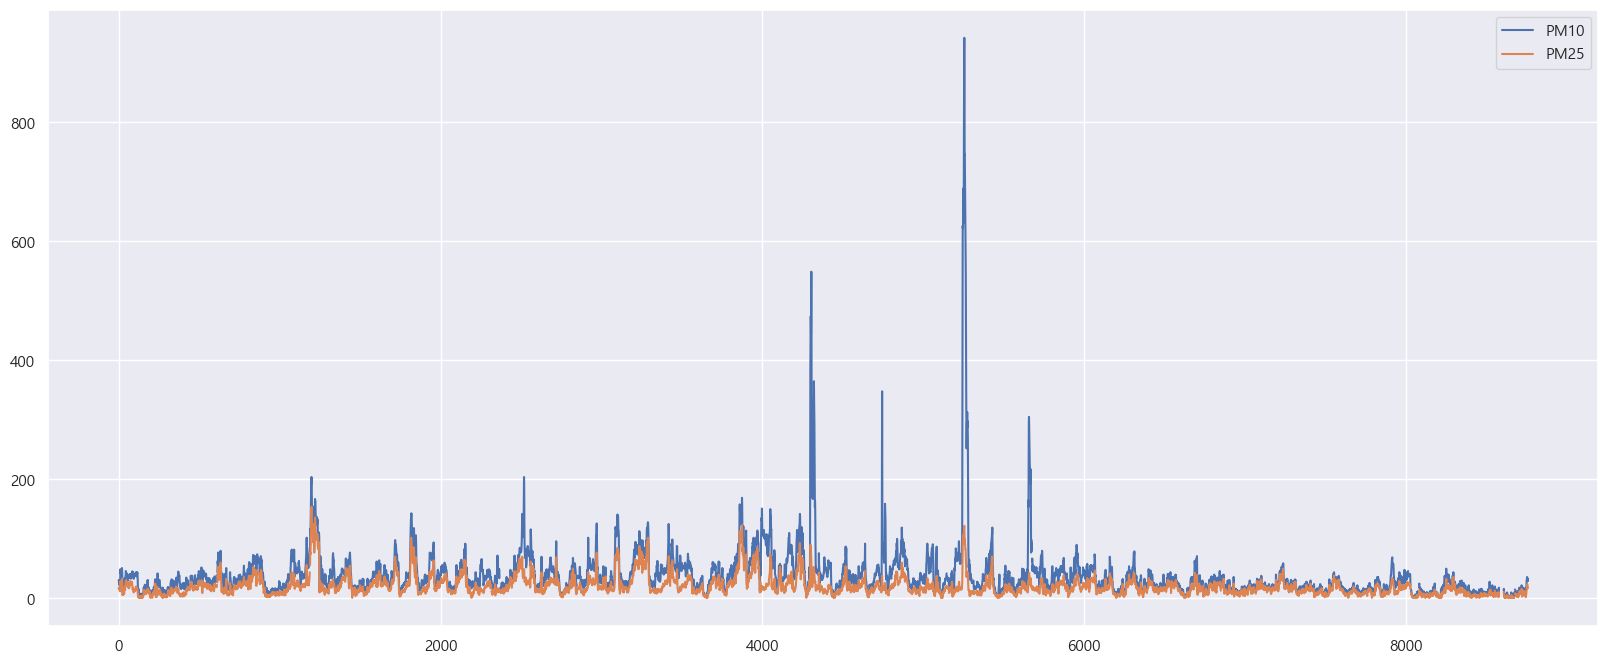

In [23]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

air_21[['PM10','PM25']].plot.line(figsize=(20,8))



In [24]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.




In [25]:
# 시각화를 통해 알게된 사실을 정리해봅니다.
# 1. 
# 2.
# 3.

---

#### **<span style="color:blue">[1-6] 날씨 데이터 분석</span>**

In [26]:
weather_21

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6,2021-01-01 01:00:00
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6,2021-01-01 02:00:00
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6,2021-01-01 03:00:00
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5,2021-01-01 04:00:00
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5,2021-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,108,서울,2021-12-31 19:00,-6.4,NaN,NaN,NaN,2.2,NaN,250.0,...,2000,NaN,NaN,-4.5,NaN,-0.5,-0.7,-0.1,1.0,2021-12-31 19:00:00
8755,108,서울,2021-12-31 20:00,-6.3,NaN,NaN,NaN,4.1,NaN,320.0,...,2000,NaN,NaN,-5.3,NaN,-0.6,-0.8,-0.1,1.0,2021-12-31 20:00:00
8756,108,서울,2021-12-31 21:00,-6.7,NaN,NaN,NaN,4.8,NaN,320.0,...,2000,NaN,NaN,-5.7,NaN,-0.7,-0.8,-0.1,1.0,2021-12-31 21:00:00
8757,108,서울,2021-12-31 22:00,-7.5,NaN,NaN,NaN,3.0,NaN,320.0,...,2000,NaN,NaN,-6.2,NaN,-0.8,-0.9,-0.2,1.0,2021-12-31 22:00:00


<AxesSubplot:>

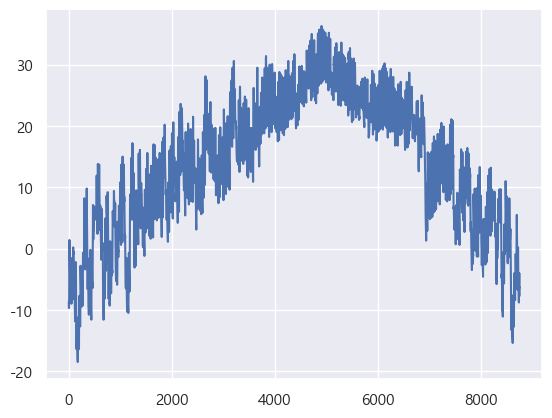

In [27]:
# weather_21,weather_22 의 다양한 변수에 대하여 시각화

weather_21['기온(°C)'].plot.line()



<AxesSubplot:>

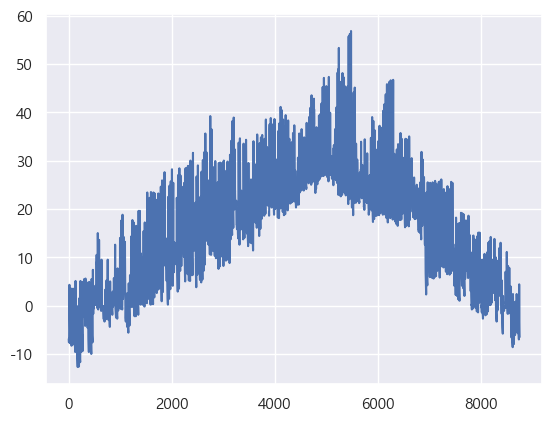

In [28]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

weather_21['지면온도(°C)'].plot.line()



In [29]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.





In [30]:
# 시각화를 통해 알게된 사실을 정리해봅니다.
# 1. 
# 2.
# 3.

In [31]:
pm_rate_21.columns

Index(['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM25', '주소', 'time', '지점', '지점명', '일시', '기온(°C)', '풍속(m/s)',
       '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)',
       '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)',
       '현상번호(국내식)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

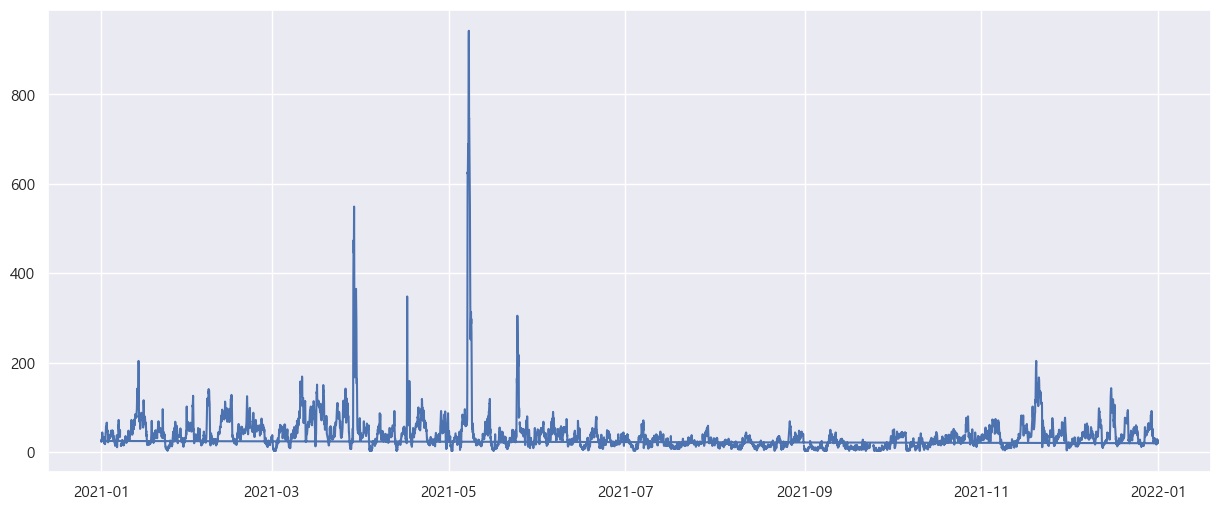

In [32]:
plt.figure(figsize=(15, 6))
plt.plot('time', 'PM10', data=pm_rate_21)
plt.show()

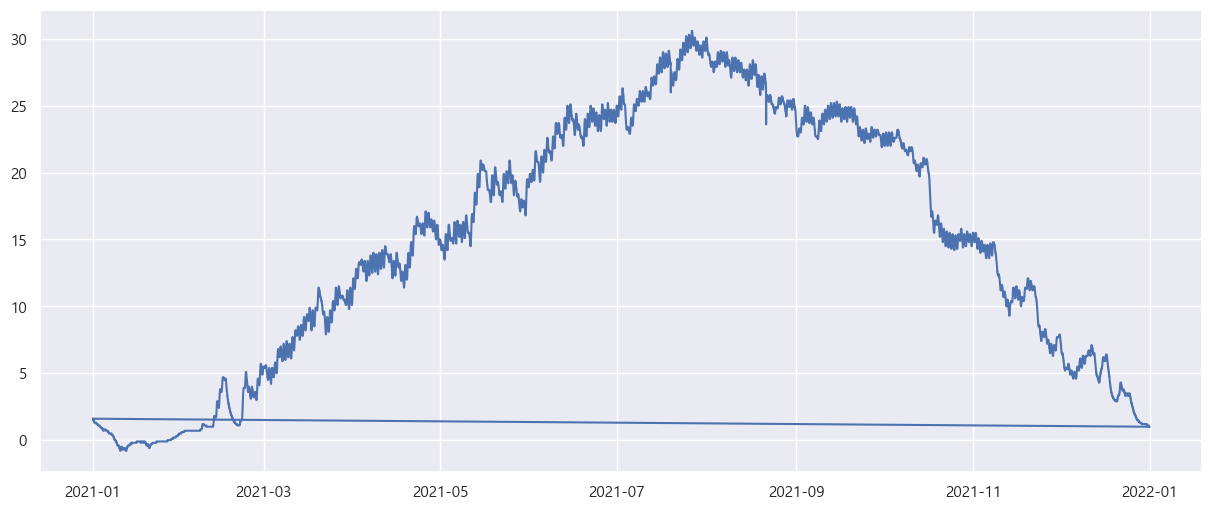

In [48]:
plt.figure(figsize=(15, 6))
plt.plot('time', '30cm 지중온도(°C)', data=pm_rate_21)
plt.show()

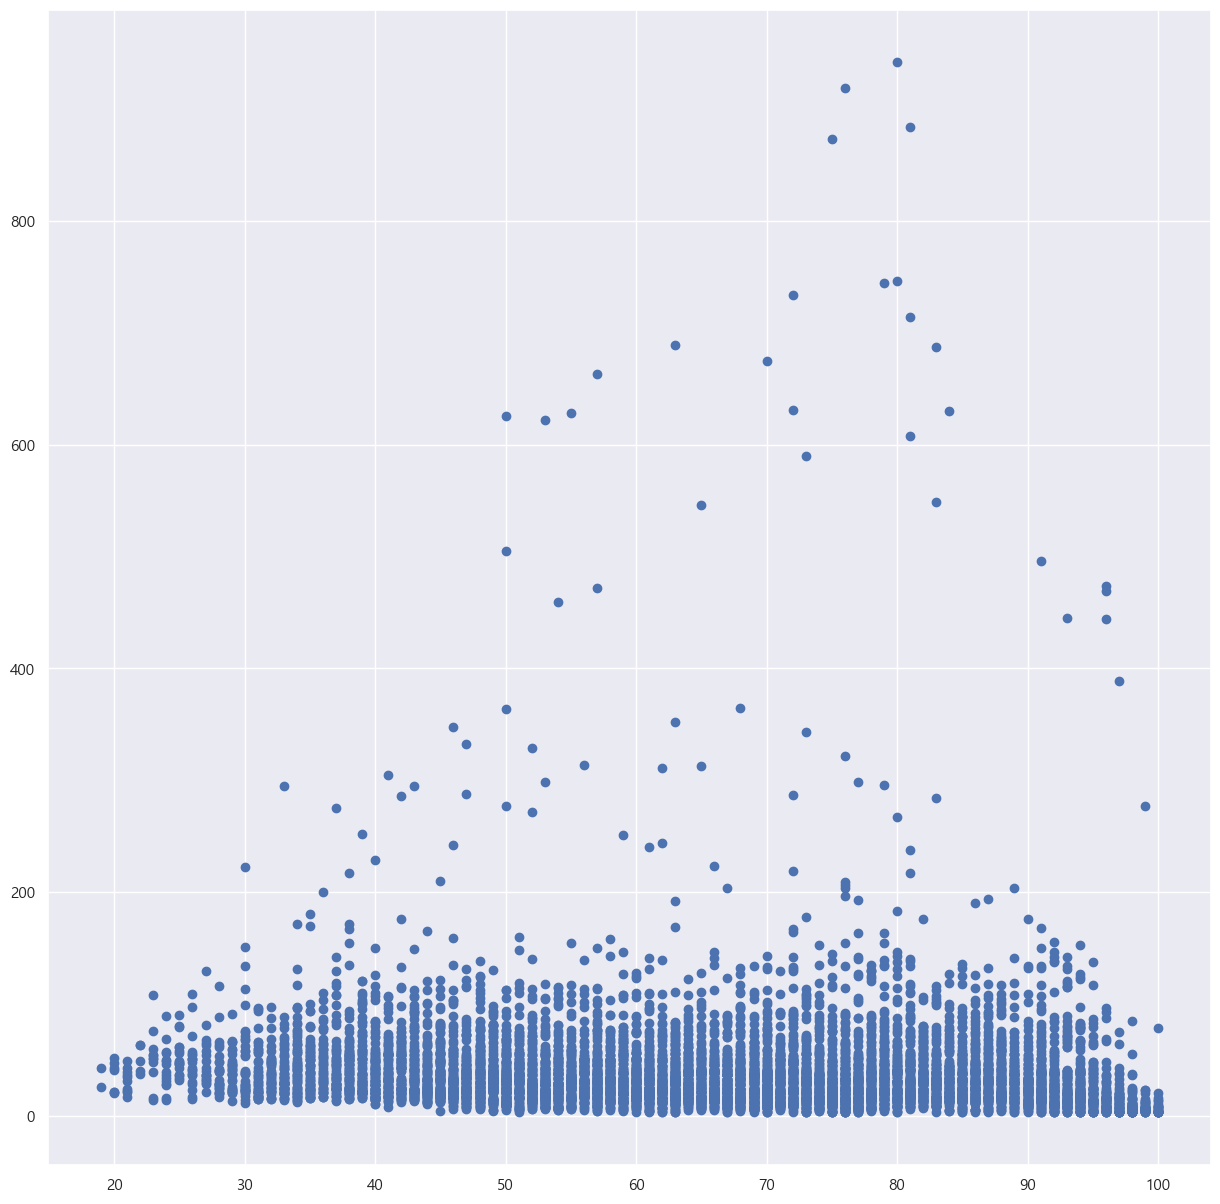

In [45]:
plt.figure(figsize=(15, 15))
plt.scatter('습도(%)', 'PM10', data=pm_rate_21)

# o3, no2